###### Business Objective:
**To extract E-books of your choice and extract summary ,categorize summary as positive,negative or neutral. Build a NLP model to achieve the said objective with accepted accuracy of 75% and above.**

###### 1. Importing Necessary Libraries

In [78]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
!pip install pdfminer

In [80]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

###### 2. Summary Extraction

In [81]:
# Calculate number of pages 
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import resolve1

file = open('C://Users//User//Wings of fire.pdf', 'rb')
parser = PDFParser(file)
document = PDFDocument(parser)

# This will give you the count of pages
print(resolve1(document.catalog['Pages'])['Count'])

141


In [82]:
# Using PyPDF2

from PyPDF2 import PdfFileReader
pdf = PdfFileReader(file)
num_pages = pdf.getNumPages()
print(num_pages)

141


In [83]:
information = pdf.getDocumentInfo()
print(information)

{'/Author': 'Printers1', '/Title': 'Wings of fire by Abdul Kalam', '/ModDate': 'D:20161123054149Z', '/Producer': '3-Heights(TM) PDF Optimization Shell 4.7.19.0 (http://www.pdf-tools.com)'}


In [2]:
from pdfminer.high_level import extract_text
import io

text_str = extract_text("C://Users//User//Wings of fire.pdf") # extraction of pdf into text
output_file = open("C://Users//User//output6.txt", "w" , encoding="utf-8") # conert pdf file to text file
output_file.write(text_str)
output_file.close()

In [3]:
text_str

'\x0c\x0c\x0cWINGS OF FIRE\n\nAn Autobiography\n\nAVUL PAKIR JAINULABDEEN ABDUL KALAM  has\ncome to personally represent to many of his countrymen the\nbest aspects of Indian life. Born in 1931, the son of a little\neducated  boatowner  in  Rameswaram,  Tamilnadu,  he  had\nan unparalleled career as a defence scientist, culminating\nin the highest civilian award of India, the Bharat Ratna.\n\nAs  chief  of \n\nthe  country’s  defence  research  and\ndevelopment  programme,  Kalam  demonstrated  the  great\npotential  for  dynamism  and  innovation  that  existed  in\nseemingly  moribund  research  establishments.  This  is  the\nstory of Kalam’s rise from obscurity and his personal and\nprofessional struggles, as well as the story of Agni, Prithvi,\nAkash,  Trishul a nd Nag  - missiles  that  have  become\nhousehold names in India and that have raised the nation to\nthe level of a missile power of international recokoning.\n\nAt  the  same  time  as  he  has  helped  create  India’s\na

In [85]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
stopWords = set(stopwords.words("english"))
words = word_tokenize(text_str)
ps = PorterStemmer()

freqTable = dict()
for word in words:
    word = ps.stem(word)
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1
print(freqTable)

{'wing': 8, 'fire': 25, 'autobiographi': 1, 'avul': 2, 'pakir': 3, 'jainulabdeen': 7, 'abdul': 8, 'kalam': 30, 'ha': 62, 'come': 42, 'person': 88, 'repres': 7, 'mani': 57, 'hi': 275, 'countrymen': 4, 'best': 26, 'aspect': 15, 'indian': 79, 'life': 76, '.': 2972, 'born': 15, '1931': 2, ',': 2774, 'son': 13, 'littl': 26, 'educ': 24, 'boatown': 1, 'rameswaram': 50, 'tamilnadu': 1, 'unparallel': 1, 'career': 12, 'defenc': 56, 'scientist': 85, 'culmin': 7, 'highest': 4, 'civilian': 6, 'award': 8, 'india': 69, 'bharat': 3, 'ratna': 2, 'chief': 9, 'countri': 81, '’': 282, 'research': 57, 'develop': 173, 'programm': 68, 'demonstr': 15, 'great': 74, 'potenti': 11, 'dynam': 11, 'innov': 16, 'exist': 25, 'seemingli': 2, 'moribund': 1, 'establish': 34, 'thi': 284, 'stori': 22, 'rise': 3, 'obscur': 2, 'profession': 18, 'struggl': 8, 'well': 27, 'agni': 53, 'prithvi': 32, 'akash': 10, 'trishul': 13, 'nd': 1, 'nag': 16, '-': 3, 'missil': 178, 'becom': 34, 'household': 1, 'name': 18, 'rais': 6, 'natio

In [87]:
sentences = sent_tokenize(text_str)
sentenceValue = dict()

for sentence in sentences:
    word_count_in_sentence = (len(word_tokenize(sentence)))
    word_count_in_sentence_except_stop_words = 0
    for wordValue in freqTable:
        if wordValue in sentence.lower():
            word_count_in_sentence_except_stop_words += 1
            if sentence in sentenceValue:
                sentenceValue[sentence] += freqTable[wordValue]
            else:
                sentenceValue[sentence] = freqTable[wordValue]

    if sentence in sentenceValue:
        sentenceValue[sentence] = sentenceValue[sentence] / word_count_in_sentence_except_stop_words

print(sentenceValue)

{'\x0c\x0c\x0cWINGS OF FIRE\n\nAn Autobiography\n\nAVUL PAKIR JAINULABDEEN ABDUL KALAM  has\ncome to personally represent to many of his countrymen the\nbest aspects of Indian life.': 81.63265306122449, 'Born in 1931, the son of a little\neducated  boatowner  in  Rameswaram,  Tamilnadu,  he  had\nan unparalleled career as a defence scientist, culminating\nin the highest civilian award of India, the Bharat Ratna.': 117.73846153846154, 'As  chief  of \n\nthe  country’s  defence  research  and\ndevelopment  programme,  Kalam  demonstrated  the  great\npotential  for  dynamism  and  innovation  that  existed  in\nseemingly  moribund  research  establishments.': 115.53225806451613, 'This  is  the\nstory of Kalam’s rise from obscurity and his personal and\nprofessional struggles, as well as the story of Agni, Prithvi,\nAkash,  Trishul a nd Nag  - missiles  that  have  become\nhousehold names in India and that have raised the nation to\nthe level of a missile power of international recokoning

In [88]:
sumValues = 0
for entry in sentenceValue:
    sumValues += sentenceValue[entry]

# Average value of a sentence from original text
average = (sumValues / len(sentenceValue))

print(average)

202.58854095276655


In [89]:
summary = ''

for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] >= (1.1 * average)):
        summary += " " + sentence

print(".............................................................SUMMARY........................................................",summary)

.............................................................SUMMARY........................................................  Evening, business time before study at night. This  might  seem 
to  disqualify  me  as  his
biographer, and I certainly had no notion of being one. One
day, while speaking to him, I

asked him if he had a message for young Indians. His
message fascinated me. His conversation was not
always easy to follow, but was always fresh and stimulating. I  possessed. For myself, writing this book has been like a pilgrimage. In  fact,  this  book

provides  only  a  thumbnail  sketch  of  Dr  Kalam’s  life. I  am  solely  responsible  for  such  shortcomings,
which are, of course, completely unintentional. I  thank  Dr  B
Soma Raju for his tangible, but always unspoken support,
for  this  project. I thank them all. Historically, people have always fought among themselves
on one issue or another. Prehistorically, battles were fought
over food and shelter. My answer is an e

In [90]:
print(len(text_str))
print(len(summary))

364289
35114


###### 3. Data Cleaning 

In [2]:
import pandas as pd
E_Book=pd.read_csv("C://Users//User//Wings-of-fire.csv")
E_Book.columns = ['WINGS OF FIRE']    
E_Book.rename(columns={'WINGS OF FIRE': 'sentences'}, inplace=True)
E_Book

,sentences
0,An Autobiography
1,AVUL PAKIR JAINULABDEEN ABDUL KALAM has
2,come to personally represent to many of his co...
3,"best aspects of Indian life. Born in 1931, the..."
4,"educated boatowner in Rameswaram, Tamilnadu, h..."
...,...
6489,system. The Technology Vision – 2020 plan will...
6490,place certain schemes and plans for the econom...
6491,and prosperity of the nation. These two plans ...
6492,out of the nation’s dreams. I


###### Looking NAN values 


In [11]:
E_Book.dtypes

sentences    object
dtype: object

In [12]:
E_Book.shape

(6434, 1)

In [13]:
E_Book.isna().sum()

sentences    0
dtype: int64

In [15]:
E_Book['sentences'].unique()

array(['An Autobiography', 'AVUL PAKIR JAINULABDEEN ABDUL KALAM has',
       'come to personally represent to many of his countrymen the', ...,
       'and prosperity of the nation. These two plans have evolved',
       'out of the nation’s dreams. I', '\x0c'], dtype=object)

In [16]:
E_Book['sentences']

0                                        An Autobiography
1                 AVUL PAKIR JAINULABDEEN ABDUL KALAM has
2       come to personally represent to many of his co...
3       best aspects of Indian life. Born in 1931, the...
4       educated boatowner in Rameswaram, Tamilnadu, h...
                              ...                        
6489    system. The Technology Vision – 2020 plan will...
6490    place certain schemes and plans for the econom...
6491    and prosperity of the nation. These two plans ...
6492                        out of the nation’s dreams. I
6493                                                    

Name: sentences, Length: 6434, dtype: object

In [5]:
E_Book.describe()

,sentences
count,6434
unique,6404
top,***
freq,16


In [4]:
E_Book=E_Book.dropna()

##### 3 Preprocessing Text


In [95]:
# removes all the punctuations ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
import string
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [96]:
def text_process(E_Book):
    E_Book['sentences']=E_Book['sentences'].apply(lambda x: remove_punctuation(x.lower())) # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
    stemmer = PorterStemmer() # stemming
    words = stopwords.words("english") # stop words example: "the, I, our etc"
    E_Book['cleaned_text']= E_Book['sentences'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() 
                                                                if i not in words]).lower())
    return E_Book

In [97]:
text_process(E_Book)

,sentences,cleaned_text
0,an autobiography,autobiographi
1,avul pakir jainulabdeen abdul kalam has,avul pakir jainulabdeen abdul kalam
2,come to personally represent to many of his co...,come person repres mani countrymen
3,best aspects of indian life born in 1931 the s...,best aspect indian life born son littl
4,educated boatowner in rameswaram tamilnadu he had,educ boatown rameswaram tamilnadu
...,...,...
6489,system the technology vision – 2020 plan will ...,system technolog vision plan put
6490,place certain schemes and plans for the econom...,place certain scheme plan econom growth
6491,and prosperity of the nation these two plans h...,prosper nation two plan evolv
6492,out of the nation’s dreams i,nation dream


###### 4 Exploratory Data Analysis


In [98]:
E_Book

,sentences,cleaned_text
0,an autobiography,autobiographi
1,avul pakir jainulabdeen abdul kalam has,avul pakir jainulabdeen abdul kalam
2,come to personally represent to many of his co...,come person repres mani countrymen
3,best aspects of indian life born in 1931 the s...,best aspect indian life born son littl
4,educated boatowner in rameswaram tamilnadu he had,educ boatown rameswaram tamilnadu
...,...,...
6489,system the technology vision – 2020 plan will ...,system technolog vision plan put
6490,place certain schemes and plans for the econom...,place certain scheme plan econom growth
6491,and prosperity of the nation these two plans h...,prosper nation two plan evolv
6492,out of the nation’s dreams i,nation dream


###### Emotion mining

In [99]:
#Sentiment analysis
afinn = pd.read_csv('C://Users//User//Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [100]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [101]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [102]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [103]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [104]:
E_Book['sentiment_value'] = E_Book['sentences'].apply(calculate_sentiment)

In [105]:
# how many words are in the sentence?
E_Book['word_count'] = E_Book['sentences'].str.split().apply(len)
E_Book['word_count'].head(100)

0       2
1       6
2      10
3      13
4       7
       ..
99     10
100     6
101     9
102    11
103     1
Name: word_count, Length: 100, dtype: int64

In [106]:
E_Book.sort_values(by='sentiment_value').tail(10)

,sentences,cleaned_text,sentiment_value,word_count
2315,abilities i did not rate his chances as very g...,abil rate chanc good,7,11
1152,charge r varadharajan and won a word of praise...,charg r varadharajan word prais,7,11
2860,accomplished were outstanding but we still had...,accomplish outstand still long way,7,10
5635,you like me to do to celebrate the agni succes...,like celebr agni success tomorrow,7,11
6481,opportunity of working with the great visionar...,opportun work great visionari,8,9
4762,excited and encouraged to see the best profess...,excit encourag see best profession,8,9
71,your love your care your faith gave me strength,love care faith gave strength,8,9
6434,leader supported by a large team of brilliant ...,leader support larg team brilliant dedic,8,10
6469,the best of human beings and the best of innov...,best human be best innov mind,8,11
1364,need to win the best performances are accompli...,need win best perform accomplish,9,8


###### Categorizing summary as positive,negative or neutral

In [107]:
def value_to_categorical(x):
    if x > 0.0:
        return "Positive"
    if x==0.0:
        return "Neutral" 
    return "Negative"

In [108]:
E_Book['category']=E_Book['sentiment_value'].apply(value_to_categorical)
E_Book

,sentences,cleaned_text,sentiment_value,word_count,category
0,an autobiography,autobiographi,0,2,Neutral
1,avul pakir jainulabdeen abdul kalam has,avul pakir jainulabdeen abdul kalam,0,6,Neutral
2,come to personally represent to many of his co...,come person repres mani countrymen,0,10,Neutral
3,best aspects of indian life born in 1931 the s...,best aspect indian life born son littl,3,13,Positive
4,educated boatowner in rameswaram tamilnadu he had,educ boatown rameswaram tamilnadu,0,7,Neutral
...,...,...,...,...,...
6489,system the technology vision – 2020 plan will ...,system technolog vision plan put,1,10,Positive
6490,place certain schemes and plans for the econom...,place certain scheme plan econom growth,3,9,Positive
6491,and prosperity of the nation these two plans h...,prosper nation two plan evolv,0,10,Neutral
6492,out of the nation’s dreams i,nation dream,1,6,Positive


In [109]:
E_Book['category'].value_counts()

Neutral     4164
Positive    1557
Negative     713
Name: category, dtype: int64

In [110]:
E_Book['sentiment_value'].describe()

count    6434.000000
mean        0.334162
std         1.395823
min        -6.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: sentiment_value, dtype: float64

In [111]:
temp = E_Book.groupby('sentiment_value').count()['sentences'].reset_index().sort_values(by='sentiment_value',ascending=False)
temp.style.background_gradient(cmap='Purples')


,sentiment_value,sentences
15,9,1
14,8,5
13,7,16
12,6,11
11,5,60
10,4,103
9,3,295
8,2,579
7,1,487
6,0,4164


In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [114]:
import en_core_web_sm  
import spacy
import re
nlp = spacy.load("en_core_web_md")

In [115]:
def normalize(msg):
    msg = re.sub('[^A-Za-z]+', ' ', msg) #remove special character and intergers
    doc = nlp(msg)
    res=[]
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2): #word filteration
            pass
        else:
            res.append(token.lemma_.lower())
    return res

E_Book["cleaned_text_1"] = E_Book["cleaned_text"].apply(normalize)
E_Book.head()

,sentences,cleaned_text,sentiment_value,word_count,category,cleaned_text_1
0,an autobiography,autobiographi,0,2,Neutral,[autobiographi]
1,avul pakir jainulabdeen abdul kalam has,avul pakir jainulabdeen abdul kalam,0,6,Neutral,"[avul, pakir, jainulabdeen, abdul, kalam]"
2,come to personally represent to many of his co...,come person repres mani countrymen,0,10,Neutral,"[come, person, repre, mani, countryman]"
3,best aspects of indian life born in 1931 the s...,best aspect indian life born son littl,3,13,Positive,"[good, aspect, indian, life, bear, son, littl]"
4,educated boatowner in rameswaram tamilnadu he had,educ boatown rameswaram tamilnadu,0,7,Neutral,"[educ, boatown, rameswaram, tamilnadu]"


###### Common Words used in summary 


In [116]:
# words count
from collections import Counter
words_collection = Counter([words for subtext in E_Book['cleaned_text_1'] for words in subtext])
most_common = pd.DataFrame(words_collection.most_common(50))
most_common.columns = ['most_common_word','count']
most_common

,most_common_word,count
0,work,264
1,prof,208
2,missil,180
3,develop,173
4,technolog,164
5,project,152
6,system,146
7,time,145
8,team,139
9,launch,131


###### Visualizing results (Barchart for top 30 words)

<AxesSubplot:title={'center':'Top 30 words'}, xlabel='most_common_word'>

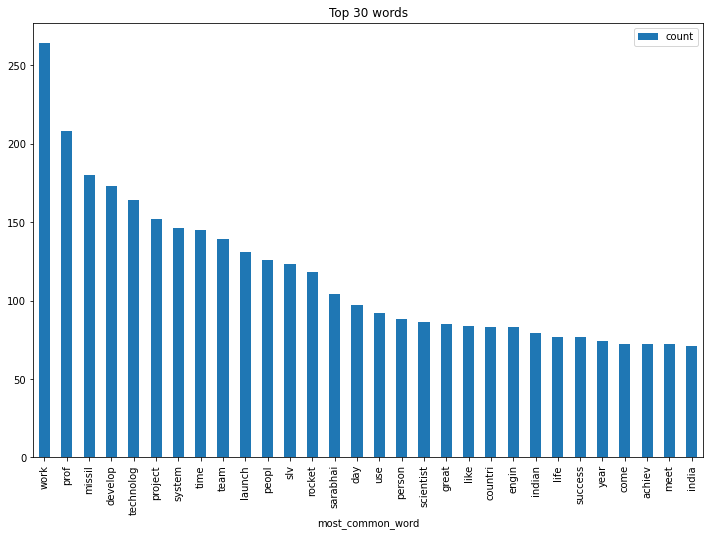

In [117]:
#Visualizing results (Barchart for top 30 words)
most_common[0:30].plot.bar(x='most_common_word',figsize=(12,8),title='Top 30 words')

###### Ratio Comparision

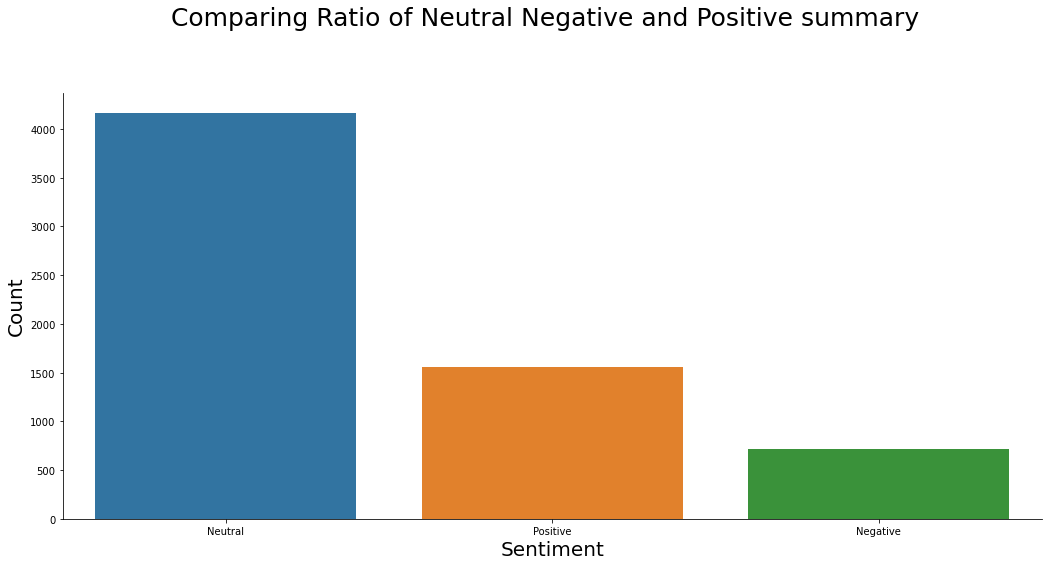

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive summary", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "category", data = E_Book)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

###### Wordcloud:Most repeated words in each category


In [119]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [120]:
neu=E_Book[E_Book["category"] == "Neutral"]["cleaned_text"]
neg=E_Book[E_Book["category"] == "Negative"]["cleaned_text"]
pos=E_Book[E_Book["category"] == "Positive"]["cleaned_text"]

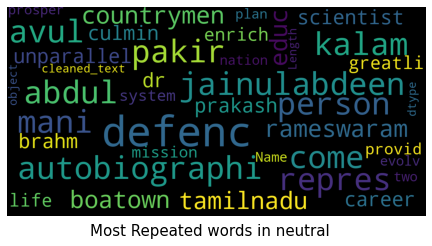

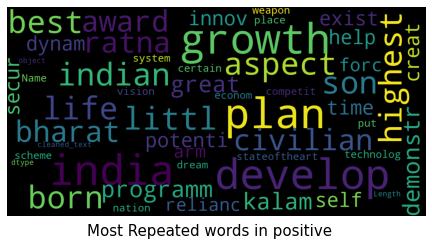

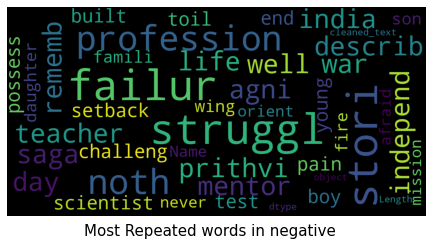

In [121]:
word_cloud(neu, "Most Repeated words in neutral")
word_cloud(pos, "Most Repeated words in positive")
word_cloud(neg, "Most Repeated words in negative")

###### 5. Feature Extraction


###### i. Bag of Words 


In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [124]:
!pip install textblob

In [125]:
from textblob import TextBlob

In [126]:
E_Book['polarity'] = E_Book['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
E_Book.head()

,sentences,cleaned_text,sentiment_value,word_count,category,cleaned_text_1,polarity
0,an autobiography,autobiographi,0,2,Neutral,[autobiographi],0.0
1,avul pakir jainulabdeen abdul kalam has,avul pakir jainulabdeen abdul kalam,0,6,Neutral,"[avul, pakir, jainulabdeen, abdul, kalam]",0.0
2,come to personally represent to many of his co...,come person repres mani countrymen,0,10,Neutral,"[come, person, repre, mani, countryman]",0.0
3,best aspects of indian life born in 1931 the s...,best aspect indian life born son littl,3,13,Positive,"[good, aspect, indian, life, bear, son, littl]",1.0
4,educated boatowner in rameswaram tamilnadu he had,educ boatown rameswaram tamilnadu,0,7,Neutral,"[educ, boatown, rameswaram, tamilnadu]",0.0


In [127]:
top2_words = get_top_n2_words(E_Book["cleaned_text"], n=200) #top 200
top2_E_Book = pd.DataFrame(top2_words)
top2_E_Book.columns=["Bi-gram", "Freq"]
top2_E_Book.head(50)

,Bi-gram,Freq
0,prof sarabhai,72
1,brahm prakash,35
2,dr brahm,34
3,prof dhawan,33
4,launch vehicl,32
5,defenc minist,20
6,work centr,19
7,missil develop,18
8,larg number,15
9,space research,15


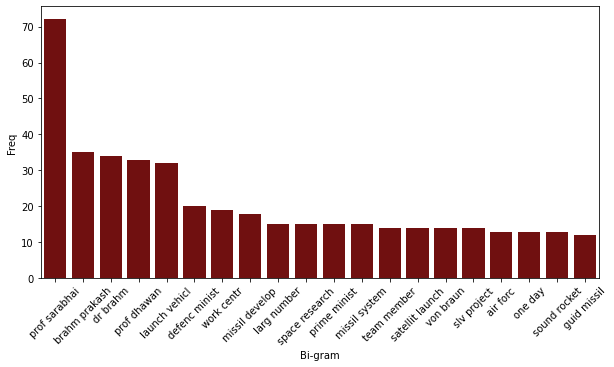

In [128]:
top20_bigram = top2_E_Book.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"],color = 'maroon')
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

In [129]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [130]:
top3_words = get_top_n3_words(E_Book["cleaned_text"], n=200)
top3_E_Book = pd.DataFrame(top3_words)
top3_E_Book.columns=["Tri-gram", "Freq"]
top3_E_Book.head(20)

,Tri-gram,Freq
0,dr brahm prakash,32
1,satellit launch vehicl,13
2,minist indira gandhi,6
3,missil develop programm,6
4,prof mgk menon,5
5,launch vehicl slv,5
6,prof vikram sarabhai,5
7,prof satish dhawan,5
8,prime minist indira,5
9,apj abdul kalam,4


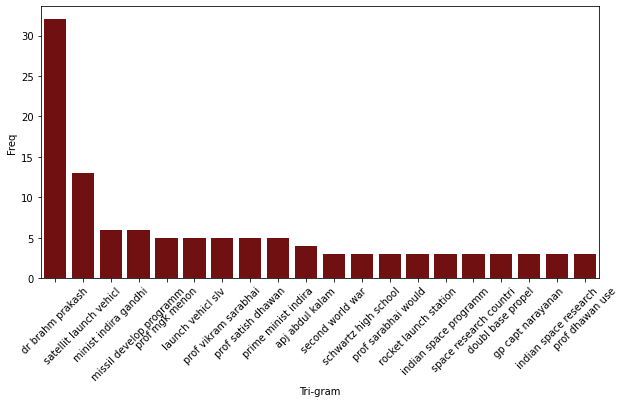

In [131]:
import seaborn as sns
top20_trigram = top3_E_Book.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"], color = 'maroon')
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

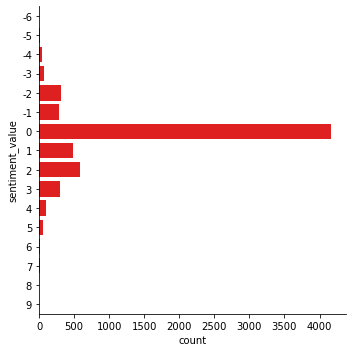

In [132]:
sns.catplot(y = 'sentiment_value' , kind = 'count',data = E_Book, color =  'red')

In [133]:
E_Book['polarity'] = E_Book['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


Text(0.5, 1.0, 'Histogram of polarity')

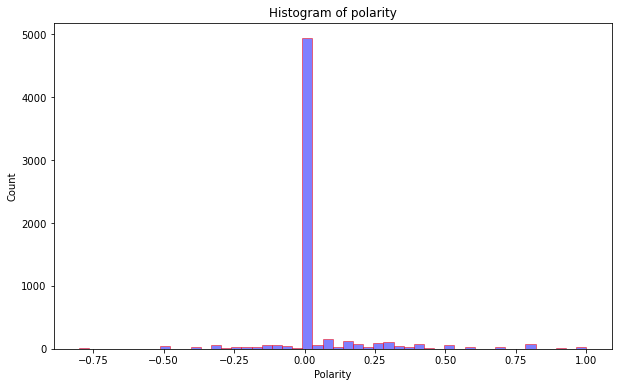

In [134]:
num_bins = 50
plt.figure(figsize=(10,6))
plt.hist(E_Book.polarity, num_bins, alpha=0.5, color = 'blue', ec = 'red')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')

###### ii. TF-IDF 


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), 
                                                 max_features = 500)

In [137]:
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(E_Book)

In [138]:
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['category', 'cleaned_text', 'cleaned_text_1', 'polarity', 'sentences', 'sentiment_value', 'word_count']
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [139]:
E_Book1 = pd.DataFrame(E_Book)
E_Book1.to_csv(r'Updated_E_Book_Data.csv', index=False)